# Assignment is at the bottom! 

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

In [2]:
y = np.concatenate([np.zeros(10), np.ones(10)])
x = np.linspace(0, 10, len(y))

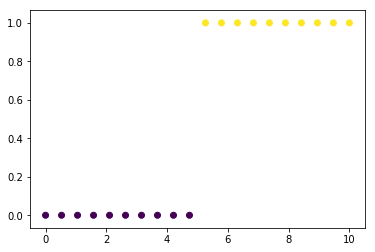

In [3]:
plt.scatter(x, y, c=y)

In [4]:
model = LogisticRegression()

In [5]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

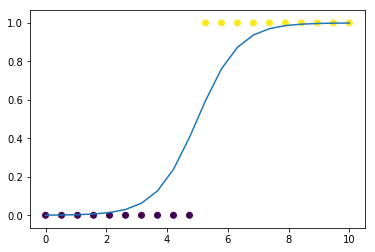

In [6]:
plt.scatter(x,y, c=y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1])

In [7]:
b, b0 = model.coef_, model.intercept_
model.coef_, model.intercept_

(array([[1.46709085]]), array([-7.33542562]))

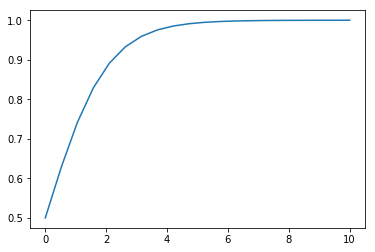

In [8]:
plt.plot(x, 1/(1+np.exp(-x)))

In [9]:
b

array([[1.46709085]])

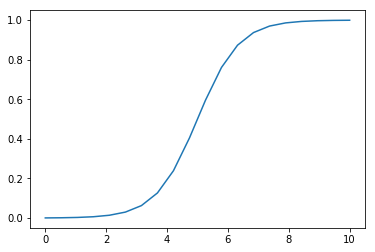

In [10]:
plt.plot(x, 1/(1+np.exp(-(b[0]*x +b0))))

In [2]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1/(1+np.exp(-(b[0]*X +b[0]*Y +b0)))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 2000x1000 with 0 Axes>

In [12]:
X

array([[-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       ...,
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75]])

In [13]:
Y

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.75,  -9.75,  -9.75, ...,  -9.75,  -9.75,  -9.75],
       [ -9.5 ,  -9.5 ,  -9.5 , ...,  -9.5 ,  -9.5 ,  -9.5 ],
       ...,
       [  9.25,   9.25,   9.25, ...,   9.25,   9.25,   9.25],
       [  9.5 ,   9.5 ,   9.5 , ...,   9.5 ,   9.5 ,   9.5 ],
       [  9.75,   9.75,   9.75, ...,   9.75,   9.75,   9.75]])

What if the data doesn't really fit this pattern?

In [14]:
y = np.concatenate([np.zeros(10), np.ones(10), np.zeros(10)])
x = np.linspace(0, 10, len(y))

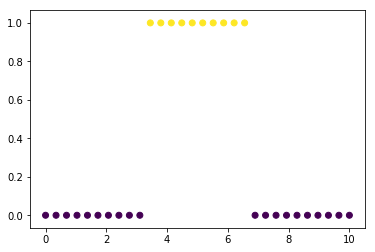

In [15]:
plt.scatter(x,y, c=y)

In [16]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

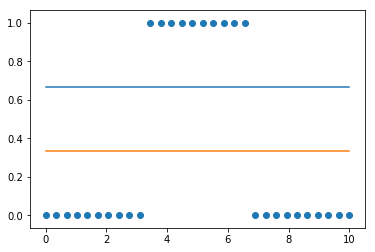

In [17]:
plt.scatter(x,y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

In [18]:
model1 = LogisticRegression()
model1.fit(x[:15].reshape(-1, 1),y[:15])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
model2 = LogisticRegression()
model2.fit(x[15:].reshape(-1, 1),y[15:])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

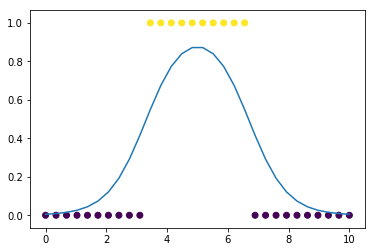

In [20]:
plt.scatter(x,y, c=y)
plt.plot(x, model1.predict_proba(x.reshape(-1, 1))[:,1] * model2.predict_proba(x.reshape(-1, 1))[:,1])

In [21]:
df = pd.read_csv('../data/adult.data', index_col=False)
golden = pd.read_csv('../data/adult.test', index_col=False)

In [54]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

In [23]:
transform_columns = ['sex', 'workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country', 'salary']

In [24]:
x = df.copy()

x[transform_columns] = enc.fit_transform(df[transform_columns])

golden['salary'] = golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K')
xt = golden.copy()

xt[transform_columns] = enc.transform(golden[transform_columns])

In [25]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [26]:
golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K').unique()

array([' <=50K', ' >50K'], dtype=object)

In [27]:
model.fit(preprocessing.scale(x.drop('salary', axis=1)), x.salary)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred = model.predict(preprocessing.scale(x.drop('salary', axis=1)))
pred_test = model.predict(preprocessing.scale(xt.drop('salary', axis=1)))

In [29]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [4]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [31]:
accuracy_score(x.salary, pred)

0.8250360861152913

In [32]:
#accuracy_score(x.salary, pred)
confusion_matrix(x.salary, pred)
#print(classification_report(x.salary, pred))
#print(classification_report(xt.salary, pred_test))

array([[23300,  1420],
       [ 4277,  3564]])

In [33]:
print(classification_report(x.salary, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     24720
         1.0       0.72      0.45      0.56      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.70      0.72     32561
weighted avg       0.81      0.83      0.81     32561



In [34]:
print(classification_report(xt.salary, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     12435
         1.0       0.70      0.45      0.55      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281



# Assignment 

## 1. Use your own dataset (`Heart.csv` is acceptable), create a train and a test set,  and build 2 models: Logistic Regression and Decision Tree (shallow). Compare the test results using `classification_report` and `confusion_matrix`. Explain which algorithm is optimal
## 2. Repeat 1. but let the Decision Tree be much deeper to allow over-fitting. Compare the two models' test results again, and explain which is optimal

In [128]:
heart = pd.read_csv('/Users/meganrahrig/Desktop/Heart.csv', index_col=False)
#heart.head()

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

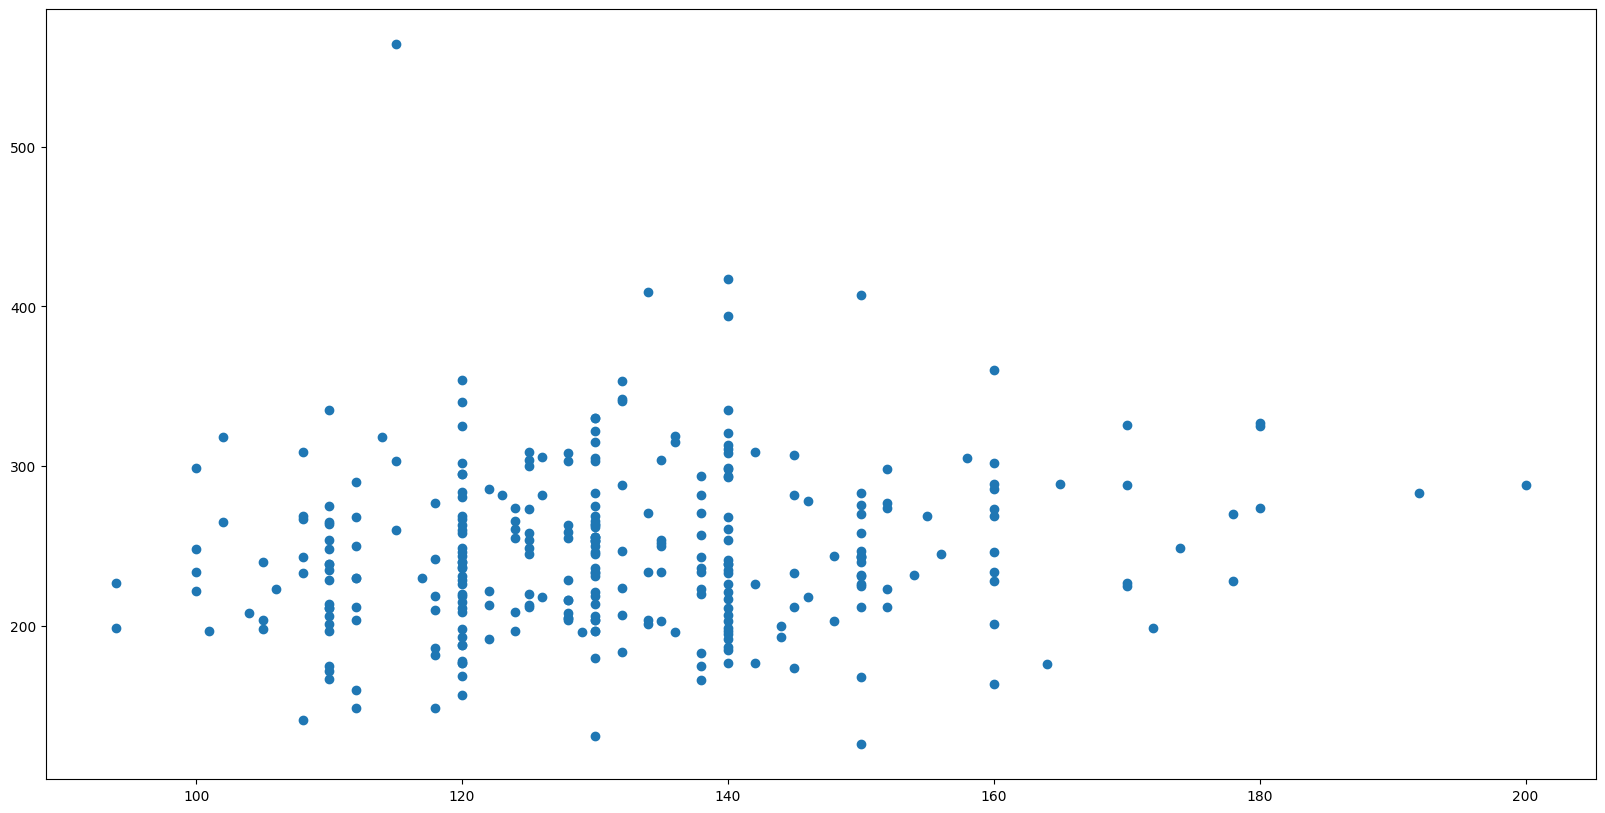

In [49]:
#plt.scatter(heart.RestBP, heart.Chol)

In [152]:
model_lr = LogisticRegression() 

In [137]:
transform_columns = ['AHD', 'ChestPain', 'Thal']

In [138]:
x = heart.copy()

x[transform_columns] = enc.fit_transform(heart[transform_columns])


In [84]:
#x = heart.AHD.values.reshape(-1, 1)

In [139]:
x.head()
y=heart.AHD
X=heart.Chol

In [153]:
model_lr.fit(X.values.reshape(-1, 1),y)

LogisticRegression()

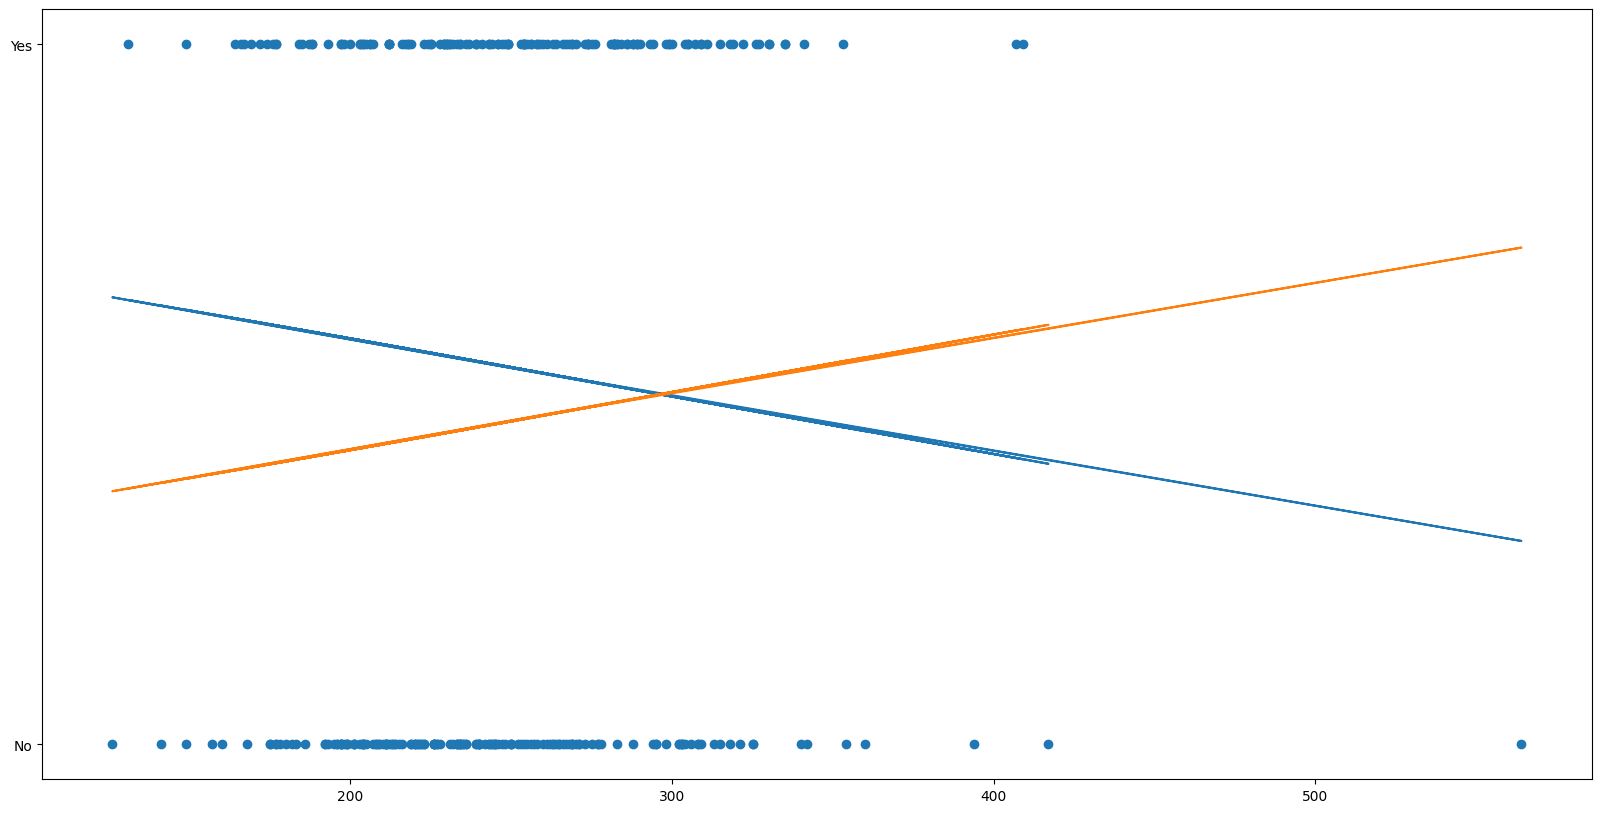

In [154]:
plt.scatter(X,y)
plt.plot(X, model_lr.predict_proba(X.values.reshape(-1, 1)))

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [156]:
#model.fit(X_train, y_train)
model_lr.fit(X_train.values.reshape(-1, 1),y_train)

LogisticRegression()

In [157]:
pred1_test = model_lr.predict(X_test.values.reshape(-1, 1))

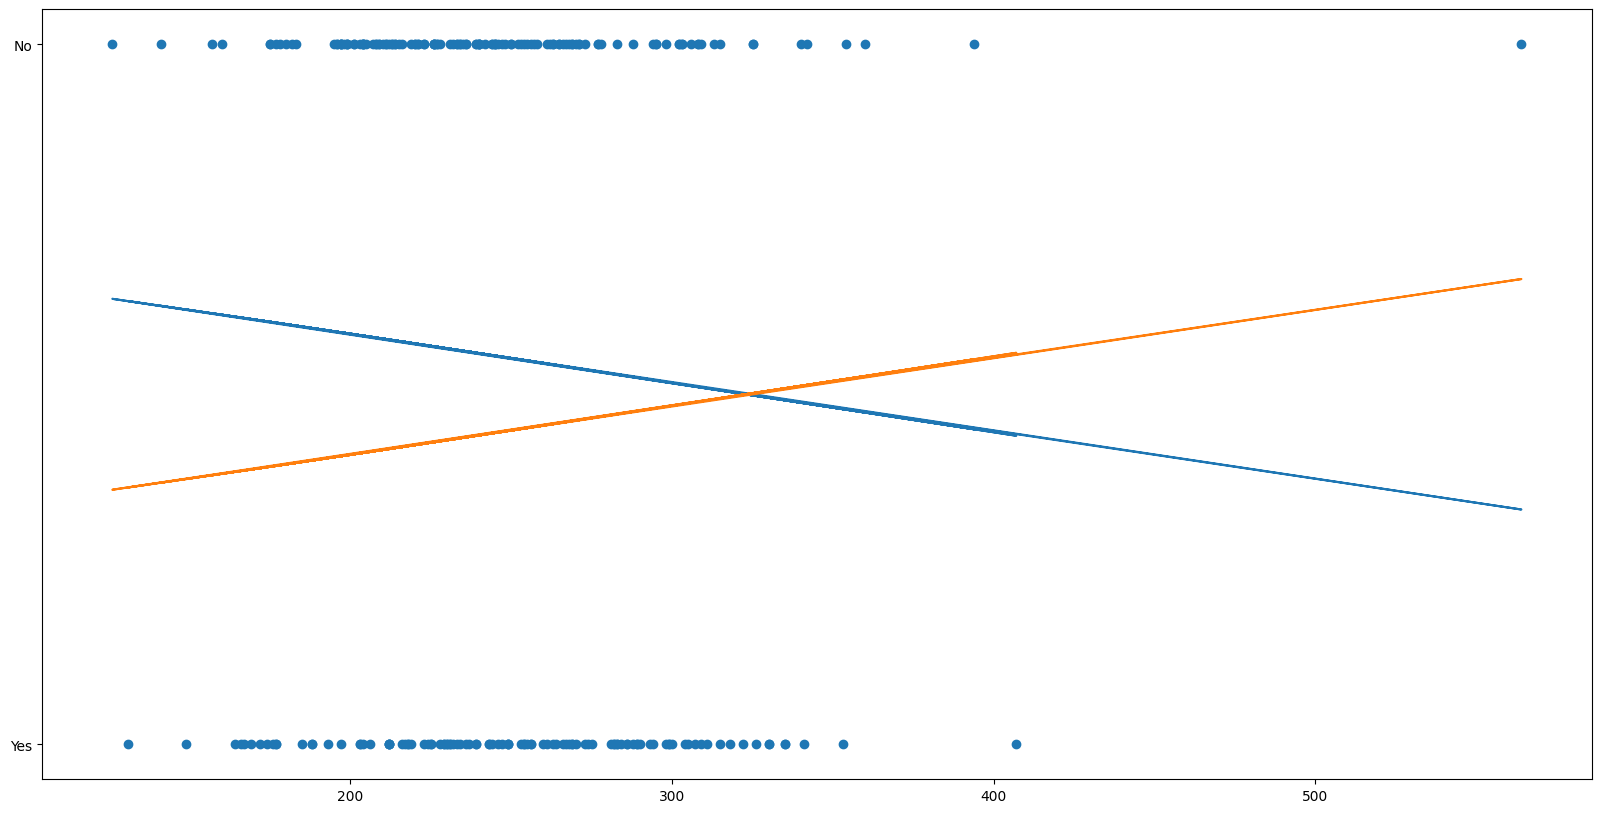

In [158]:
plt.scatter(X_train,y_train)
plt.plot(X_train, model_lr.predict_proba(X_train.values.reshape(-1, 1)))

In [159]:
model_tree = DecisionTreeClassifier(max_depth=3, random_state=50)
model_tree.fit(X_train.values.reshape(-1, 1),y_train)

DecisionTreeClassifier(max_depth=3, random_state=50)

In [160]:
pred2_test = model_tree.predict(X_test.values.reshape(-1, 1))

> accuracy scores

In [167]:
accuracy_score_lr = accuracy_score(y_test, pred1_test)
print('model_lr')
print(accuracy_score_lr)
accuracy_score_tree = accuracy_score(y_test, pred2_test)
print('model_tree')
print(accuracy_score_tree)

model_lr
0.5081967213114754
model_tree
0.4918032786885246


> confusion_matrix

In [168]:
confusion_matrix_lr =confusion_matrix(y_test, pred1_test)
print('model_lr')
print(confusion_matrix_lr)
confusion_matrix_tree =confusion_matrix(y_test, pred2_test)
print('model_tree')
print(confusion_matrix_tree)

model_lr
[[29  1]
 [29  2]]
model_tree
[[22  8]
 [23  8]]


> classification_report

In [169]:
print('model_lr')
print(classification_report(y_test, pred1_test))
print('model_tree')
print(classification_report(y_test, pred2_test))


model_lr
              precision    recall  f1-score   support

          No       0.50      0.97      0.66        30
         Yes       0.67      0.06      0.12        31

    accuracy                           0.51        61
   macro avg       0.58      0.52      0.39        61
weighted avg       0.58      0.51      0.38        61

model_tree
              precision    recall  f1-score   support

          No       0.49      0.73      0.59        30
         Yes       0.50      0.26      0.34        31

    accuracy                           0.49        61
   macro avg       0.49      0.50      0.46        61
weighted avg       0.49      0.49      0.46        61



> Explain which algorithm is optimal

- The logistic regression model has a higher accuracy score
- The logistic regression model is more likely to predict true positives correctly, at 67% according to the classification report. It also had the fewest false positives on the confusion matrix.
- The logistic regression model has a much lower recall than the decision tree model, at only 6% compard to 26%. It also had the most false negatives on the confusion matrix.

In conclusion, while the logistic regression model is more likely to accurately predict true positives correctly (more likely to correctly predict heart disease), it is less likely to catch all cases of true positives (more likely to underdiagnose heart disease). Since the data in question is regarding a serious health issue, I would say that the decision tree model is preferable because it would be better to over-predict heart disease in patients than to miss many cases of it, letting them go untreated.

>Repeat 1. but let the Decision Tree be much deeper to allow over-fitting.

In [171]:
model_tree_over = DecisionTreeClassifier(random_state=50)
model_tree_over.fit(X_train.values.reshape(-1, 1),y_train)

DecisionTreeClassifier(random_state=50)

In [172]:
pred3_test = model_tree_over.predict(X_test.values.reshape(-1, 1))

>accuracy test

In [178]:
accuracy_score_lr = accuracy_score(y_test, pred1_test)
print('model_lr')
print(accuracy_score_lr)
accuracy_score_tree = accuracy_score(y_test, pred2_test)
print('model_tree')
print(accuracy_score_tree)
accuracy_score_tree_over = accuracy_score(y_test, pred3_test)
print('model_tree_over')
print(accuracy_score_tree_over)

model_lr
0.5081967213114754
model_tree
0.4918032786885246
model_tree_over
0.47540983606557374


>confusion matrix

In [179]:
confusion_matrix_lr =confusion_matrix(y_test, pred1_test)
print('model_lr')
print(confusion_matrix_lr)
confusion_matrix_tree =confusion_matrix(y_test, pred2_test)
print('model_tree')
print(confusion_matrix_tree)
confusion_matrix_tree_over =confusion_matrix(y_test, pred3_test)
print('model_tree_over')
print(confusion_matrix_tree_over)

model_lr
[[29  1]
 [29  2]]
model_tree
[[22  8]
 [23  8]]
model_tree_over
[[14 16]
 [16 15]]


> classification report

In [180]:
print('model_lr')
print(classification_report(y_test, pred1_test))
print('model_tree')
print(classification_report(y_test, pred2_test))
print('model_tree_over')
print(classification_report(y_test, pred3_test))


model_lr
              precision    recall  f1-score   support

          No       0.50      0.97      0.66        30
         Yes       0.67      0.06      0.12        31

    accuracy                           0.51        61
   macro avg       0.58      0.52      0.39        61
weighted avg       0.58      0.51      0.38        61

model_tree
              precision    recall  f1-score   support

          No       0.49      0.73      0.59        30
         Yes       0.50      0.26      0.34        31

    accuracy                           0.49        61
   macro avg       0.49      0.50      0.46        61
weighted avg       0.49      0.49      0.46        61

model_tree_over
              precision    recall  f1-score   support

          No       0.47      0.47      0.47        30
         Yes       0.48      0.48      0.48        31

    accuracy                           0.48        61
   macro avg       0.48      0.48      0.48        61
weighted avg       0.48      0.48     

- The logistic regression model has a higher accuracy score, and the over-fitted decision tree has the lowest.
- The logistic regression model is more likely to predict true positives correctly. It also had the fewest false positives on the confusion matrix. The over-fitted decision tree is least likely to predict true positives correctly, at 48%. The over-fitted tree also has the most evenly-spread confusion matrix results, which affirms that it is the least accurate model for making correct predictions.
- The logistic regression model has a much lower recall than the decision tree model, at only 6% compard to 26% on the regular decision tree and 48% on the over-fitted decision tree.

In conclusion the logistic regression model again is most likely to make correct positive predictions but also most least likely to identify all of them. The over-fitted model is not very accurate, but if a doctor was trying to flag potential heart disease in people, it would be better to flag it with a false positive for further investigation than to ignore it with a false negative. 